In [ ]:
!pip install yfinance
!pip install tensorflow
!pip install mplfinance
!pip install seaborn



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplfinance as mpf
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from google.colab import files


In [ ]:
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

In [ ]:
data = pd.read_csv(file_name)
if 'Date' not in data.columns or 'Close' not in data.columns:
    raise ValueError("Uploaded CSV must contain 'Date' and 'Close' columns.")

data['Date'] = pd.to_datetime(data['Date'])
data.sort_values('Date', inplace=True)
data.set_index('Date', inplace=True)
close_data = data[['Close']]

import mplfinance as mpf

mpf.plot(data, type='candle', style='charles', title='Stock Price Candlestick Chart', ylabel='Price', volume=True)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_data)



NameError: name 'file_name' is not defined

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_data)


In [ ]:
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]


In [ ]:
X_train, y_train = [], []
for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)


In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 13s 76ms/step - loss: 0.0020 - val_loss: 1.3343e-04
Epoch 2/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - loss: 2.4114e-05 - val_loss: 1.2036e-04
Epoch 3/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 10s 68ms/step - loss: 2.4118e-05 - val_loss: 1.0176e-04
Epoch 4/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 11s 80ms/step - loss: 2.5776e-05 - val_loss: 9.2146e-05
Epoch 5/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 10s 82ms/step - loss: 2.5671e-05 - val_loss: 1.7248e-04


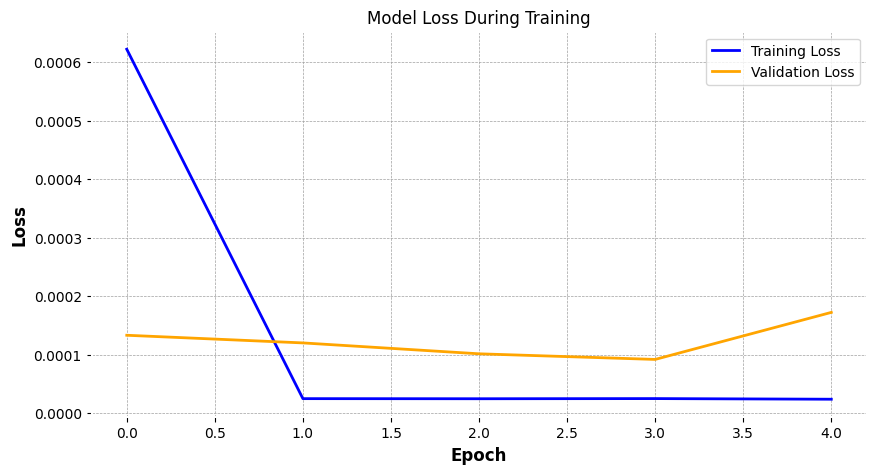

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss During Training')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()


In [ ]:
import numpy as np
test_data = np.random.rand(100, 1)
X_test, y_test = [], []
for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])
    y_test.append(test_data[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [ ]:
# Step 11: Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)


NameError: name 'model' is not defined

In [ ]:
plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(16,7))
plt.plot(real_stock_price, color='green', linestyle='-', linewidth=2, label='Real Stock Price')
plt.plot(predictions, color='orange', linestyle='--', linewidth=2, label='Predicted Stock Price')
split_point = int(len(real_stock_price) * 0.8)
plt.axvline(x=split_point, color='red', linestyle='--', linewidth=2, label='Train-Test Split')
plt.text(10, max(real_stock_price)*0.95, f'MSE: {mse:.4f}', fontsize=12, color='red')
plt.title('Real vs Predicted Stock Price', fontsize=20)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Stock Price', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()




NameError: name 'real_stock_price' is not defined

<Figure size 1600x700 with 0 Axes>

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(real_stock_price[-100:], color='green', label='Real Stock Price (Last 100)')
plt.plot(predictions[-100:], color='red', linestyle='--', label='Predicted Stock Price (Last 100)')
plt.title('Zoomed View: Last 100 Days Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()
